In [89]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [90]:
df1 = pd.read_csv('world_without.csv', sep=' ')
df2 = pd.read_csv('hetero.csv', sep=' ')
df3 = pd.read_csv('GAN.csv', sep=' ')

In [91]:
df1

,smiles
0,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O
1,O=C(O)c1cc(O)nc(O)n1
2,NC(=O)CCCC[C@H]1CCSS1
3,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...
4,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...
...,...
5898,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...
5899,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...
5900,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...
5901,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...


In [92]:
df2

,smiles
0,c1cccc(C2(OCC)CCN(C)CC2)[n+]1CC(=O)O
1,C(C(C)(C=CN(C)C)n1cccc1)C#C
2,C(CC(=O)OC)C(CN1CCc2cc(OC)c(OC)cc21)Cl
3,c1c(O)ccc(COCC(NC=O)(O)c2ccc(O)[nH]2)c1
4,c1cccc(C(=O)OC(CC)c2ccc(N(CC)CCN(C(=O)C)CC)cc2)c1
...,...
132239,C1(O)(C(O)[O-])C[nH]c2c([nH]1)CN(CO)CC[NH+]2[O-]
132240,C1CN(C)CCN1c1cc2c(c(=O)[nH]cc2C(=O)O)C2(C)CN(C...
132241,c1ccc(OC)cc1C1(O)CCCN(C)CC1([N+]([O-])=O)c1ccc...
132242,C1(C(OCC)=O)=C(C)N(C)C(C)=C(C(=O)OC)C1c1cccc([...


In [93]:
df3

,smiles
0,O(CC[NH+]([O-])O)N1CC(=O)OC(O)c2c(c(O)ccc2)C([...
1,O(NOC1OC(=O)[NH+]([n+]2[nH]c(O)cc2)CC(O)OC(O)C...
2,c1cc(C(NO)=O)[nH]c1CC(=O)N(CCOc1ccc(Br)cc1)c1c...
3,c1ccc2c(c1O)OC(OC1[n+]3[nH][nH]c3C(O)OC(O)C[NH...
4,c1cc(C(=O)[O-])[nH]c1NC(=CO)CN1C(=O)Cc2cc(OC)c...
...,...
10931,C1C23CCC(CC(=O)OC2C[n+]2[nH]c1cc2)[n+]1[nH]c(c...
10932,c1cc(O)ccc1C#CCC[O-]
10933,C1C(O)CC[N+](C)(CCN(C)OCC)C1C[n+]1cccc(C(C)([O...
10934,c1ccc2c(c1)C(=O)N(O)CCc1c([nH][n+]([O-])c1)[NH...


In [94]:
#convert SMILES to mol

df1['mol']=[""]*df1.shape[0]

for i in df1.index:
    smiles = df1["smiles"][i]
    if type(smiles) == str:
        mol = Chem.MolFromSmiles(smiles)
        df1["mol"][i] = mol

df2['mol']=[""]*df2.shape[0]

for i in df2.index:
    smiles = df2["smiles"][i]
    if type(smiles) == str:
        mol = Chem.MolFromSmiles(smiles)
        df2["mol"][i] = mol

In [95]:
df3['mol']=[""]*df3.shape[0]

for i in df3.index:
    smiles = df3["smiles"][i]
    if type(smiles) == str:
        mol = Chem.MolFromSmiles(smiles)
        df3["mol"][i] = mol

In [96]:
import numpy as np
from rdkit.Chem import rdMolDescriptors

# make a numpy matrix which have same number of rows with df1 and 42 columns
MQN_mtx = np.empty((df1.shape[0],42))

# get the MQN and save them in the MQN_mtx
for i in df1.index:
    mol = df1["mol"][i]
    MQN = rdMolDescriptors.MQNs_(mol)
    MQN_mtx[i,:]=np.array(MQN)
    
#concatenate the MQN_mtx to df1 
df1=pd.concat([df1,pd.DataFrame(MQN_mtx,columns=['MQN_'+str(i) for i in range(42)])],axis=1,)

In [97]:
df1

,smiles,mol,MQN_0,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,...,MQN_32,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41
0,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7ff3fc05c260>,6.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,O=C(O)c1cc(O)nc(O)n1,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbf62cb0>,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NC(=O)CCCC[C@H]1CCSS1,<rdkit.Chem.rdchem.Mol object at 0x7ff3fc05c3f0>,8.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCCCC[C@](C)(O)/C=C/[C@H]1[C@H](O)C[C@H](O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fc05c3a0>,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fc05c120>,18.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,C[N+]1(C)[C@@H]2C[C@H](OC(=O)C(O)(c3cccs3)c3cc...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee3300>,19.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
5899,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=C(CCC(=O)C4)[C@...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee3350>,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,3.0
5900,CC[C@]12C=CCN3CC[C@@]4(c5cc([C@@]6(C(=O)OC)C[C...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee33a0>,45.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,14.0,9.0
5901,CCCN(CCC)C(=O)[C@@H](CCC(=O)OCCCN1CCN(CCOC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee33f0>,46.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0


In [98]:
# make a numpy matrix which have same number of rows with df1 and 42 columns
MQN_mtx = np.empty((df2.shape[0],42))

# get the MQN and save them in the MQN_mtx
for i in df2.index:
    mol = df2["mol"][i]
    MQN = rdMolDescriptors.MQNs_(mol)
    MQN_mtx[i,:]=np.array(MQN)
    
#concatenate the MQN_mtx to df1 
df2=pd.concat([df2,pd.DataFrame(MQN_mtx,columns=['MQN_'+str(i) for i in range(42)])],axis=1,)

In [99]:
df2

,smiles,mol,MQN_0,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,...,MQN_32,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41
0,c1cccc(C2(OCC)CCN(C)CC2)[n+]1CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee3620>,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C(C(C)(C=CN(C)C)n1cccc1)C#C,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee37b0>,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C(CC(=O)OC)C(CN1CCc2cc(OC)c(OC)cc21)Cl,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee3760>,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3,c1c(O)ccc(COCC(NC=O)(O)c2ccc(O)[nH]2)c1,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee3670>,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c1cccc(C(=O)OC(CC)c2ccc(N(CC)CCN(C(=O)C)CC)cc2)c1,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbee35d0>,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132239,C1(O)(C(O)[O-])C[nH]c2c([nH]1)CN(CO)CC[NH+]2[O-],<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b73f0>,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
132240,C1CN(C)CCN1c1cc2c(c(=O)[nH]cc2C(=O)O)C2(C)CN(C...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b7440>,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,2.0
132241,c1ccc(OC)cc1C1(O)CCCN(C)CC1([N+]([O-])=O)c1ccc...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b7490>,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
132242,C1(C(OCC)=O)=C(C)N(C)C(C)=C(C(=O)OC)C1c1cccc([...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b74e0>,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# make a numpy matrix which have same number of rows with df1 and 42 columns
MQN_mtx = np.empty((df3.shape[0],42))

# get the MQN and save them in the MQN_mtx
for i in df3.index:
    mol = df3["mol"][i]
    MQN = rdMolDescriptors.MQNs_(mol)
    MQN_mtx[i,:]=np.array(MQN)
    
#concatenate the MQN_mtx to df1 
df3=pd.concat([df3,pd.DataFrame(MQN_mtx,columns=['MQN_'+str(i) for i in range(42)])],axis=1,)

In [101]:
df3

,smiles,mol,MQN_0,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,...,MQN_32,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41
0,O(CC[NH+]([O-])O)N1CC(=O)OC(O)c2c(c(O)ccc2)C([...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b7990>,21.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0,2.0
1,O(NOC1OC(=O)[NH+]([n+]2[nH]c(O)cc2)CC(O)OC(O)C...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fbf62ad0>,15.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,c1cc(C(NO)=O)[nH]c1CC(=O)N(CCOc1ccc(Br)cc1)c1c...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b75d0>,22.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c1ccc2c(c1O)OC(OC1[n+]3[nH][nH]c3C(O)OC(O)C[NH...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b7a80>,26.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,3.0
4,c1cc(C(=O)[O-])[nH]c1NC(=CO)CN1C(=O)Cc2cc(OC)c...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb4b7800>,22.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10931,C1C23CCC(CC(=O)OC2C[n+]2[nH]c1cc2)[n+]1[nH]c(c...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb3944e0>,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,13.0,9.0
10932,c1cc(O)ccc1C#CCC[O-],<rdkit.Chem.rdchem.Mol object at 0x7ff3fb394530>,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10933,C1C(O)CC[N+](C)(CCN(C)OCC)C1C[n+]1cccc(C(C)([O...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb394580>,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
10934,c1ccc2c(c1)C(=O)N(O)CCc1c([nH][n+]([O-])c1)[NH...,<rdkit.Chem.rdchem.Mol object at 0x7ff3fb3945d0>,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0


In [102]:
#X = df2.loc[:, 'MQN_0':'MQN_41'].to_numpy()
X = df2.loc[:, 'MQN_0':'MQN_41']

#Y = df1.loc[:, 'MQN_0':'MQN_41'].to_numpy()
Y = df1.loc[:, 'MQN_0':'MQN_41']

Z = df3.loc[:, 'MQN_0':'MQN_41']

In [103]:
X

,MQN_0,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,MQN_8,MQN_9,...,MQN_32,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41
0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132239,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0
132240,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0,2.0
132241,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
132242,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

def do_pca(n_components, data):
    pca = PCA(n_components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [105]:
pca, X_pca = do_pca(2, X)
X_pca = pd.DataFrame(X_pca)

In [106]:
pca, Y_pca = do_pca(2, Y)
Y_pca = pd.DataFrame(Y_pca)

In [107]:
pca, Z_pca = do_pca(2, Z)
Z_pca = pd.DataFrame(Z_pca)

In [112]:
concatenated = pd.concat([X_pca.assign(dataset='MuGene(Sample_size=132244)'), Y_pca.assign(dataset='ZINC_dataset(Sample_size=5903)'), Z_pca.assign(dataset='GAN(Sample_size=10936)')])

In [113]:
concatenated

,0,1,dataset
0,-8.656709,-0.489132,MuGene(Sample_size=132244)
1,-18.597671,2.627635,MuGene(Sample_size=132244)
2,-5.853187,4.863423,MuGene(Sample_size=132244)
3,-5.802208,5.190980,MuGene(Sample_size=132244)
4,3.286244,5.933652,MuGene(Sample_size=132244)
...,...,...,...
10931,26.016669,-18.902078,GAN(Sample_size=10936)
10932,-21.784901,-0.312553,GAN(Sample_size=10936)
10933,0.880227,4.938594,GAN(Sample_size=10936)
10934,0.675956,-3.495487,GAN(Sample_size=10936)


In [117]:
concatenated.rename(columns = {0 : 'PCA_feature_1'}, inplace = True)
concatenated.rename(columns = {1 : 'PCA_feature_2'}, inplace = True)

In [118]:
concatenated

,PCA_feature_1,PCA_feature_2,dataset
0,-8.656709,-0.489132,MuGene(Sample_size=132244)
1,-18.597671,2.627635,MuGene(Sample_size=132244)
2,-5.853187,4.863423,MuGene(Sample_size=132244)
3,-5.802208,5.190980,MuGene(Sample_size=132244)
4,3.286244,5.933652,MuGene(Sample_size=132244)
...,...,...,...
10931,26.016669,-18.902078,GAN(Sample_size=10936)
10932,-21.784901,-0.312553,GAN(Sample_size=10936)
10933,0.880227,4.938594,GAN(Sample_size=10936)
10934,0.675956,-3.495487,GAN(Sample_size=10936)


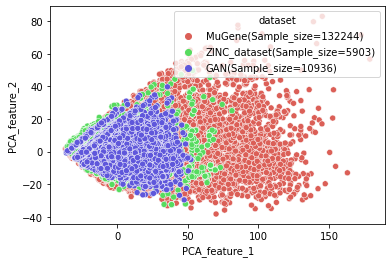

In [119]:
sns.scatterplot(x = 'PCA_feature_1', y = 'PCA_feature_2', hue = 'dataset' , data=concatenated, palette = sns.hls_palette(3), legend = 'full');